In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from google.colab import drive
import os
import pickle
lab_size = 15
plt.rcParams.update({
    'font.size': lab_size,
    'font.family': 'Times New Roman',
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsmath}'  # Load amsmath package
})

In [ ]:
# function to generate a list of spectral radius values between to bounds
def generate_spectral_radii_list(start, end, steps):
  spectral_radii = np.linspace(start, end, steps)
  spectral_radii = [np.round(p, 5) for p in spectral_radii]
  spectral_radii = [str(p) for p in spectral_radii]
  return spectral_radii

# Different manners of initialising lists of spectral radii to graph against as used in different experiments.

In [ ]:
spectral_radii = np.linspace(0, 0.8, 17)
spectral_radii = [str(p) for p in spectral_radii]
spectral_radii.append('0.85')
spectral_radii.append('0.90')
spectral_radii.append('0.95')
spectral_radii.append('1.00')
spectral_radii.append('1.05')
spectral_radii.append('1.10')
randMatrices = ['M', 'Win']

spectral_radii, randMatrices

In [ ]:
spectral_radii_Lorenz_birth = generate_spectral_radii_list(0.0, 0.01, 11)
spectral_radii = [str(p) for p in spectral_radii_Lorenz_birth]
spectral_radii

In [ ]:
spectral_radii_Lorenz_birth = generate_spectral_radii_list(0.004, 0.002, 40)
spectral_radii = [str(p) for p in spectral_radii_Lorenz_birth]
spectral_radii

In [ ]:
spectral_radii_Lorenz_birth = generate_spectral_radii_list(0.00365, 0, 1435)
spectral_radii = [float(p) for p in spectral_radii_Lorenz_birth]
spectral_radii[650:700]

In [ ]:
p = spectral_radii[22]
randMat = randMatrices[0]
print(p, randMat)

In [ ]:
def time_ts(natural_time):
        return int(natural_time/0.01)

# Load Function

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

def load_dictionary(file_path):
    with open(file_path, 'rb') as file:
        loaded_dictionary = pickle.load(file)
    print(f"Data loaded successfully from {file_path}")
    return loaded_dictionary

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Different file paths to different experimental data tested with and plotted at different times with this notebook.

In [ ]:
file_path = f'drive/My Drive/bifurcation_analysis_data/{p}_{randMat}.pkl'
f = f'drive/My Drive/bifurcation_analysis_data/trajectories_rho_{np.round(float(p), 4)}.pdf'

In [ ]:
file_path = f'drive/My Drive/Lorenz_birth_data/poor_mans_continuation_Lorenz_birth_0.004_to_0.002.pkl'

In [ ]:
file_path = f'drive/My Drive/Lorenz_birth_data/trimmed_poor_mans_continuation_Lorenz_birth_0.00365_to_0.pkl'

In [ ]:
file_path2 = f'drive/My Drive/Lorenz_birth_data/trimmed_poor_mans_continuation_Lorenz_birth_0.00365_to_0.00475.pkl'

# Display groups of simulations.



In [ ]:
# filepaths for different simulations visualised in the past
#file_path = f'drive/My Drive/Lorenz_birth_data/trimmed_poor_mans_continuation_Lorenz_birth_0.00365_to_0.00350.pkl'
file_path = f'drive/My Drive/Lorenz_birth_data/0.004_M.pkl'

In [ ]:
bifurcation_analysis_loaded, _ = load_dictionary(file_path)
#bifurcation_analysis_loaded2 = load_dictionary(file_path2)

Data loaded successfully from drive/My Drive/Lorenz_birth_data/0.004_M.pkl


In [ ]:
trajectories_bulk = bifurcation_analysis_loaded
#trajectories_bulk2 = bifurcation_analysis_loaded2

In [ ]:
# function to take an exploration (100 integrated ICs) and plot it against the x1x3 plane
def display_bifurcation_simulation(ax, trajectories, title):
    for i in range(len(trajectories)):
        t = trajectories[i]
        x1 = t[time_ts(70):, 0]
        x3 = t[time_ts(70):, 2]
        ax.plot(x1, x3)
        # ax.set_xlim(-60, 50)
        # ax.set_ylim(-150, 250)
    ax.set_title(title)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_3$')

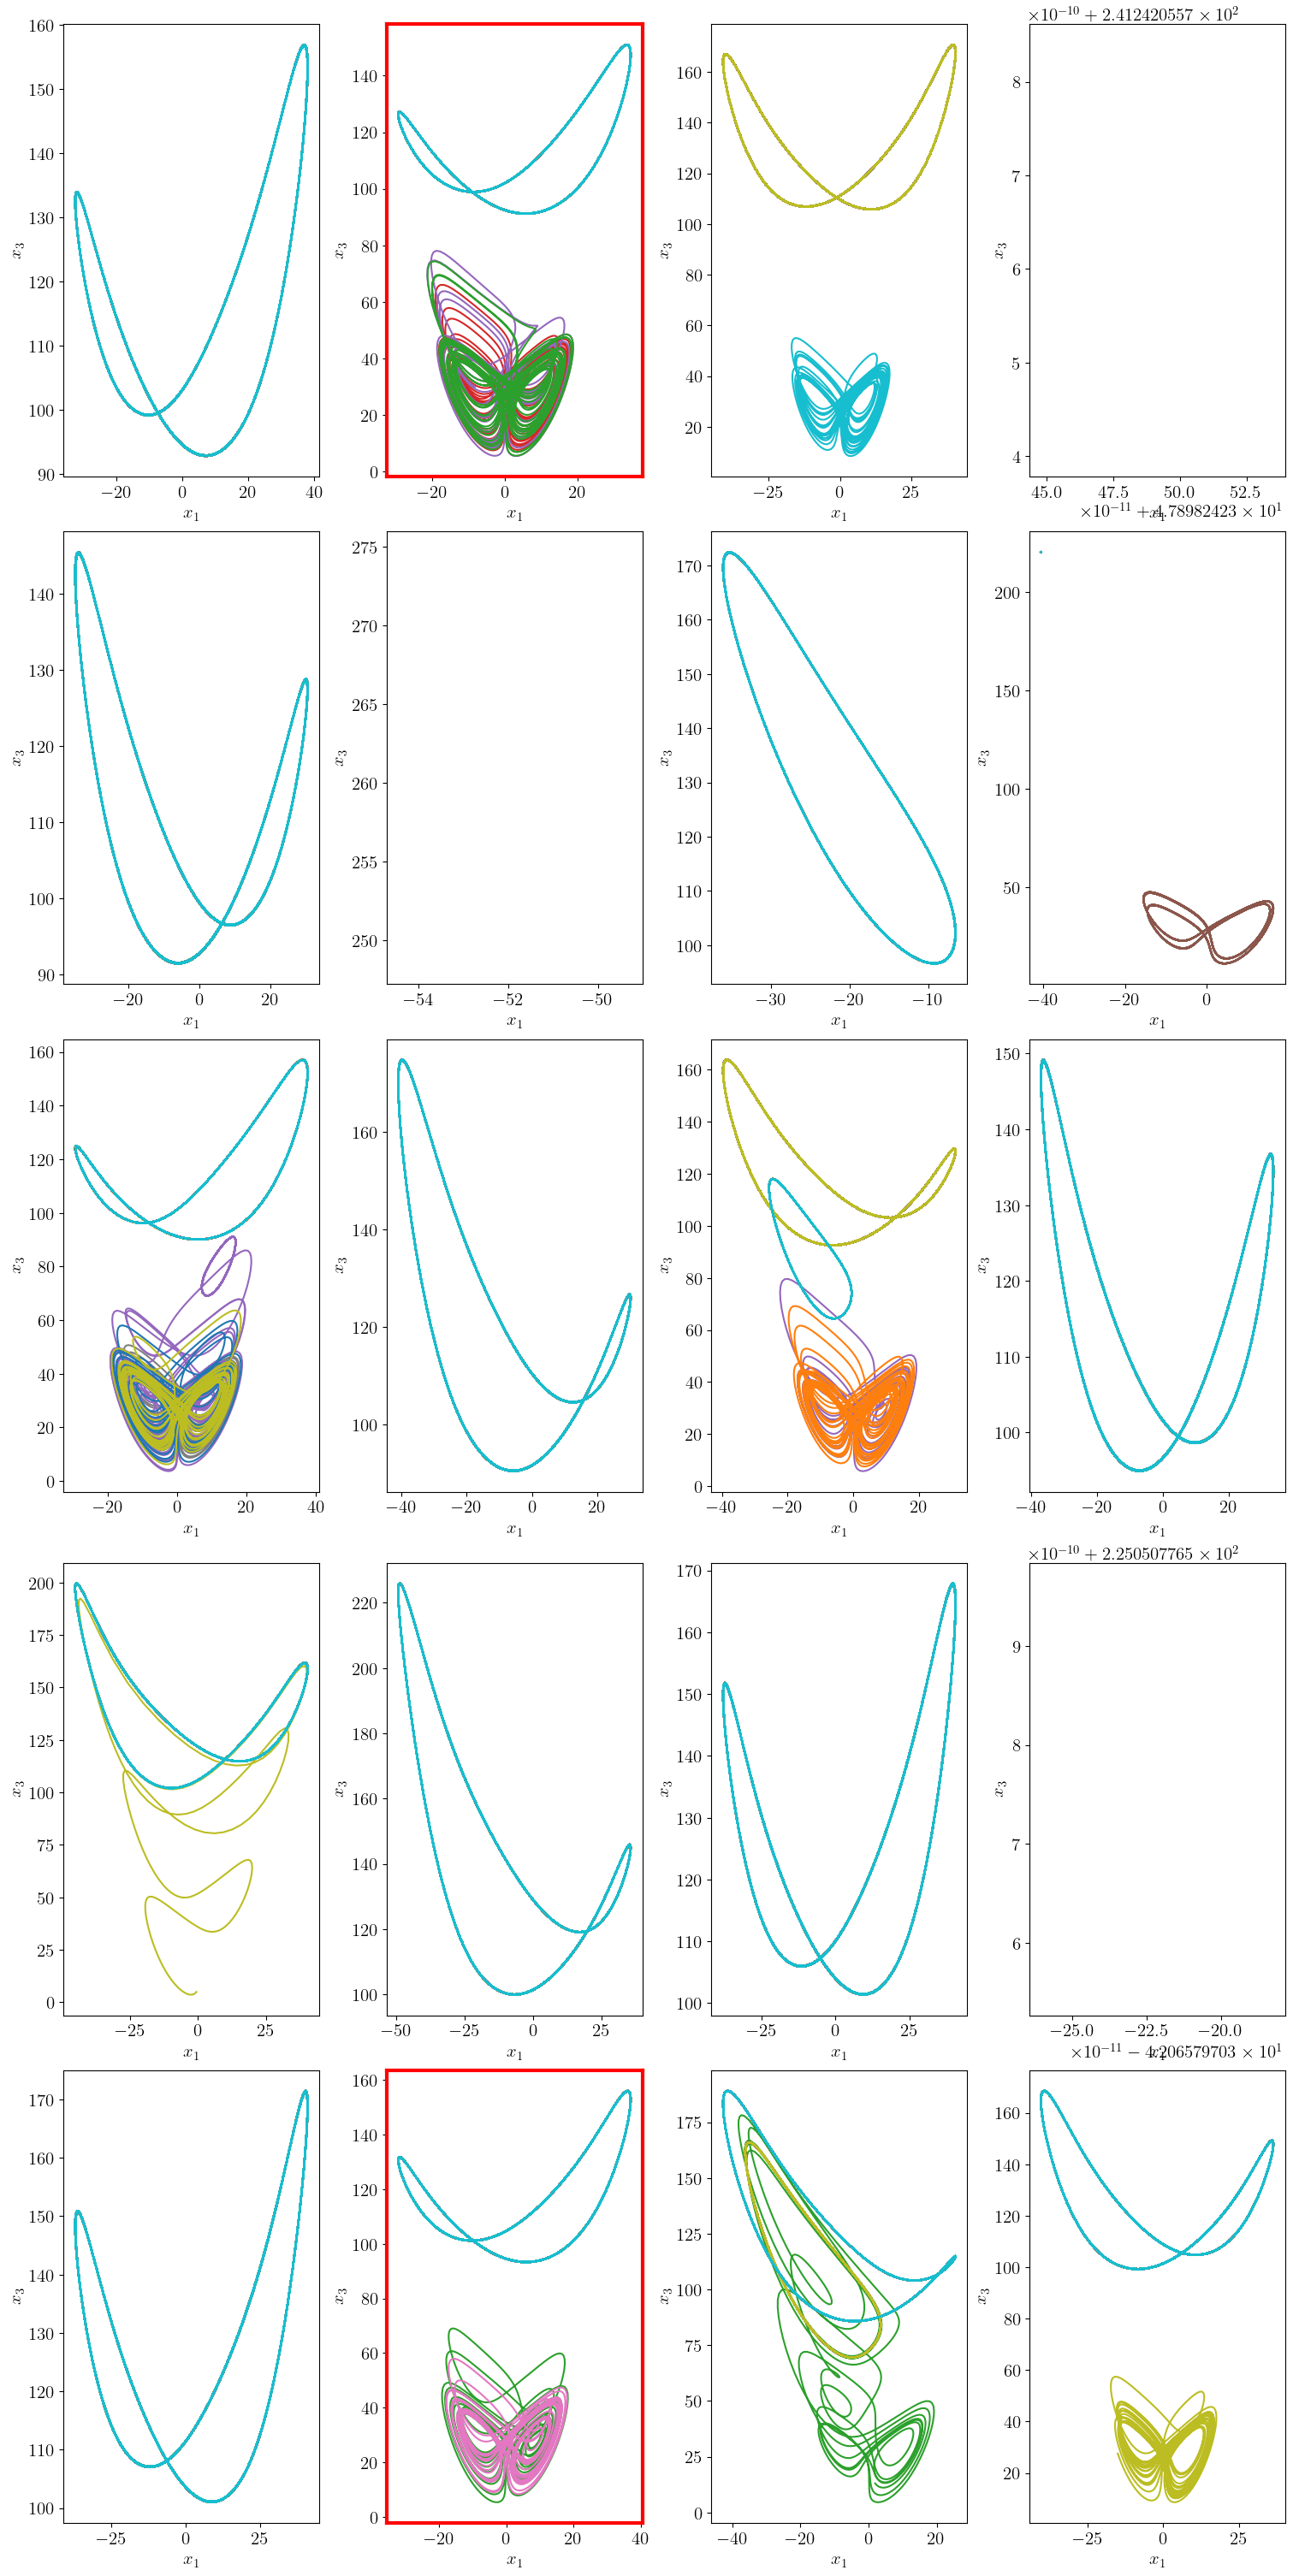

In [ ]:
# this code takes a bulk set of trajectories. A bulk set of trajectories is a set of explorations.
# it finds the number of plots it will require and the number of rows and columns accordingly
# it then configures the axis and plots the different explorations in the different configured axis.

# this specific example is minorly different as it applies a red borded around specific axis identified by other means.
num_plots = trajectories_bulk.shape[0]
num_cols = 4
num_rows = int(np.ceil(num_plots / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows), constrained_layout=True)
axs = axs.flatten()

for i, ax in enumerate(axs):
    if i < num_plots:
        trajectories = trajectories_bulk[i]
        display_bifurcation_simulation(ax, trajectories, '')

        if i == 1 or i ==17:
            for spine in ax.spines.values():
                spine.set_edgecolor('red')
                spine.set_linewidth(3)
    else:
        ax.axis('off')

#plt.show()
plt.savefig(f'drive/My Drive/bifurcation_analysis_data_pictures/trajectories_M_0.004_red_highlights.pdf',transparent = True, bbox_inches = 'tight')

# Automate the generation and saving of all the diagrams.

In [ ]:
spectral_radii[1:]

['0.001',
 '0.002',
 '0.003',
 '0.004',
 '0.005',
 '0.006',
 '0.007',
 '0.008',
 '0.009',
 '0.01']

In [ ]:
# this is the same as above, it plots an exploration of the state space
def display_bifurcation_simulation(ax, trajectories, title):
    for i in range(len(trajectories)):
        t = trajectories[i]
        x1 = t[:, 0]
        x3 = t[:, 2]
        ax.plot(x1, x3)
        # ax.set_xlim(-60, 50)
        # ax.set_ylim(-150, 250)
    ax.set_title(title)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_3$')

In [ ]:
# this is a means of generating and saving a compilation of groups of explorations
# for example, the simulation generation notebook generates data across rho values from 0.0 to 1.1. Each rho value also contains 50 explorations with varying M's, and 50 varying Win's
# this code iterates through each rho value and plots all 50 explorations across the different M/Win on one figure like the one above.
# it then saves this image in drive for easy access
# this provides a means of automating the transformation of data into visualisation
for p in spectral_radii[1:]:

    # pull the set of 50 explorations for a given rho value
    file_path = f'drive/My Drive/Lorenz_birth_data/{p}_M.pkl'
    bifurcation_analysis_loaded = load_dictionary(file_path)
    trajectories_bulk, _ = bifurcation_analysis_loaded

    #configure the axs so they may hold the 50 explorations in the figure
    num_plots = trajectories_bulk.shape[0]
    num_cols = 4
    num_rows = int(np.ceil(num_plots / num_cols))

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows), constrained_layout=True)
    axs = axs.flatten()

    #plot the explorations in the axs
    for i, ax in enumerate(axs):
        if i < num_plots:
            trajectories = trajectories_bulk[i]
            display_bifurcation_simulation(ax, trajectories, f'{np.round(float(p), 4)}')
        else:
            ax.axis('off')

    #save the figure of all the explorations as a pdf and png in drive
    plt.savefig(f'drive/My Drive/bifurcation_analysis_data_pictures/from_init_trajectories_rho_{np.round(float(p), 4)}.pdf',transparent = True, bbox_inches = 'tight')
    plt.savefig(f'drive/My Drive/bifurcation_analysis_data_pictures/from_init_trajectories_rho_{np.round(float(p), 4)}.png',transparent = False, bbox_inches = 'tight')
    print(f"Diagrams for p = {p} saved.")

Output hidden; open in https://colab.research.google.com to view.